In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# display maximum columns
pd.set_option('display.max_columns', None)

# Load the Excel file
file_path = '../evaluations/Moatless - Reported runs (2).xlsx'
excel_data = pd.ExcelFile(file_path)

save_pth = "../evaluations/figures/baselines"

# Display sheet names to understand the structure
sheet_names = excel_data.sheet_names
sheet_names

['Claude 3.5 Sonnet 2024-06-23', 'GPT-4o 2024-06-17 1']

In [3]:
# Load the data from the first sheet
df = pd.read_excel(file_path, sheet_name=sheet_names[0])

df['status'] = df['status'].fillna('Failed')

# Display the first few rows of the dataframe to understand its structure
df.head()

,instance_id,duration,total_cost,resolved_by,status,gpt4o 0617,transitions,edited,planned,identified,expected_identified,alt_identified,found_in_search,file_identified,file_in_search,edit_retries,identified_files,identified_spans,has_diff,review,lint_codes,p_query,p_file,p_code,p_class,p_function,SearchCode,SearchCode_cost,IdentifyCode,IdentifyCode_cost,DecideRelevance,DecideRelevance_cost,PlanToCode,PlanToCode_cost,ClarifyCodeChange,ClarifyCodeChange_cost,EditCode,EditCode_cost,Finished,Rejected,expected_files,edited_files,error
0,astropy__astropy-12907,39.926167,0.081861,2.0,identified,file_identified,7.0,0.0,0.0,1.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0,4.0,1.0,0.0,NaN,1.0,2.0,0.0,0.0,1.0,1.0,0.012537,1.0,0.018633,1.0,0.013620,2.0,0.024360,NaN,NaN,1.0,0.012711,1.0,NaN,['astropy/modeling/separable.py'],['astropy/modeling/separable.py'],NaN
1,astropy__astropy-14182,106.583898,0.209427,0.0,found_in_search,file_identified,13.0,0.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,2.0,3.0,1.0,0.0,"E1121,E1123",1.0,2.0,0.0,1.0,0.0,1.0,0.013542,1.0,0.049656,1.0,0.013350,5.0,0.096354,NaN,NaN,4.0,0.036525,1.0,NaN,['astropy/io/ascii/rst.py'],"['astropy/io/ascii/rst.py', 'astropy/io/ascii/...",NaN
2,astropy__astropy-14365,63.141489,0.084231,0.0,found_in_search,found_in_search,7.0,0.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.012825,1.0,0.021960,1.0,0.011400,2.0,0.018957,NaN,NaN,1.0,0.019089,1.0,NaN,['astropy/io/ascii/qdp.py'],['astropy/io/ascii/qdp.py'],NaN
3,astropy__astropy-14995,28.822958,0.119328,7.0,resolved,resolved,8.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,0.0,0.0,0.0,1.0,0.017955,1.0,0.026976,1.0,0.015552,2.0,0.029967,1.0,0.011163,1.0,0.017715,1.0,NaN,['astropy/nddata/mixins/ndarithmetic.py'],['astropy/nddata/mixins/ndarithmetic.py'],NaN
4,astropy__astropy-6938,143.902465,0.099570,0.0,found_in_search,file_identified,7.0,0.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,1.0,2.0,1.0,0.0,0.0,1.0,0.013098,1.0,0.037872,1.0,0.011211,2.0,0.019086,NaN,NaN,1.0,0.018303,1.0,NaN,['astropy/io/fits/fitsrec.py'],['astropy/io/fits/fitsrec.py'],NaN


In [4]:
df['status'].unique()

array(['identified', 'found_in_search', 'resolved', 'edited',
       'file_identified', 'Failed'], dtype=object)

In [5]:
# Calculate the proportion of each status
status_proportions = df['status'].value_counts(normalize=True)

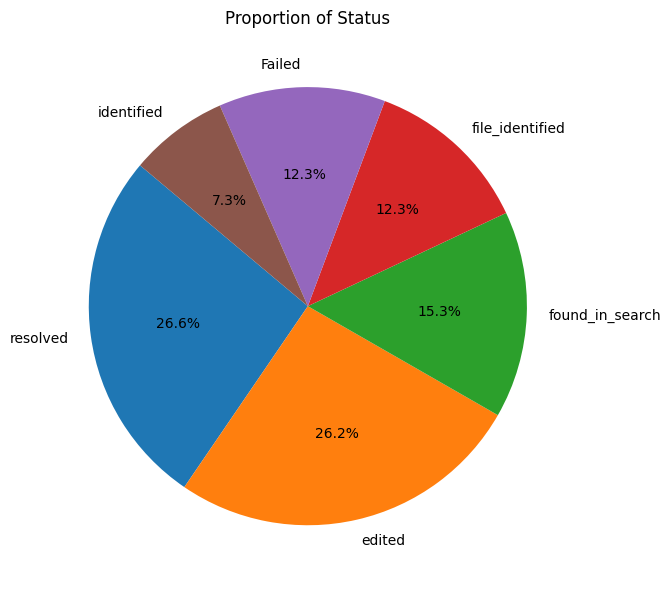

In [6]:
# Plot a pie chart
plt.figure(figsize=(10, 6))
status_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Status')
plt.ylabel('')  # Hide the y-label
plt.tight_layout()
plt.savefig(f"{save_pth}/status_proportion.png")
plt.show()

In [7]:
# Extract relevant columns
relevant_columns = ['identified', 'expected_identified', 'alt_identified', 'found_in_search', 
                    'file_identified', 'file_in_search', 'edit_retries']


# Create a summary table with counts for each status
summary_counts = df[relevant_columns].apply(pd.Series.value_counts).fillna(0).astype(int).loc[1]
summary_counts = summary_counts.sort_values(ascending=False)

# Display the summary table
summary_counts_df = summary_counts.reset_index()
summary_counts_df.columns = ['Status', 'Count']

summary_counts_df


,Status,Count
0,file_in_search,262
1,file_identified,249
2,found_in_search,214
3,identified,165
4,expected_identified,148
5,alt_identified,31
6,edit_retries,1


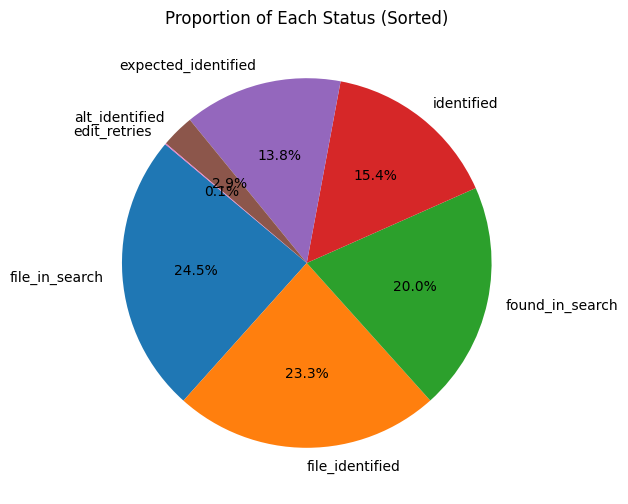

In [8]:
# Plot a pie chart for the sorted summary table
plt.figure(figsize=(10, 6))
summary_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Status (Sorted)')
plt.ylabel('')  # Hide the y-label
plt.show()
